page 21

next: explore bend radius, hypothesis = wider bend -> better dispersion -> better resolution if magnitude can be held low

p_bend_radius = 0.25
p_bend_angle = 100.0
p_drift_post_aperture = 0.001647845131336711
p_drift_pre_bend = 0.08264476762309475
p_drift_post_bend = 0.07893060501596277
p_drift_pre_hodoscope = [fit]
p_m5a_length = 0.06981600194372625
p_m5a_quad = 0.4
p_m5b_length = 0.06928842409139782
p_m5b_quad = 0.1179451296465932
p_shape_in_1 = -0.1249745550920304
p_shape_out_1 = -0.10147496294559

Magnification: -0.7075923682210754
Focus: -5.365359545539405e-09
Dispersion: 0.5186298858380054
Resolution: 0.027286987793915626


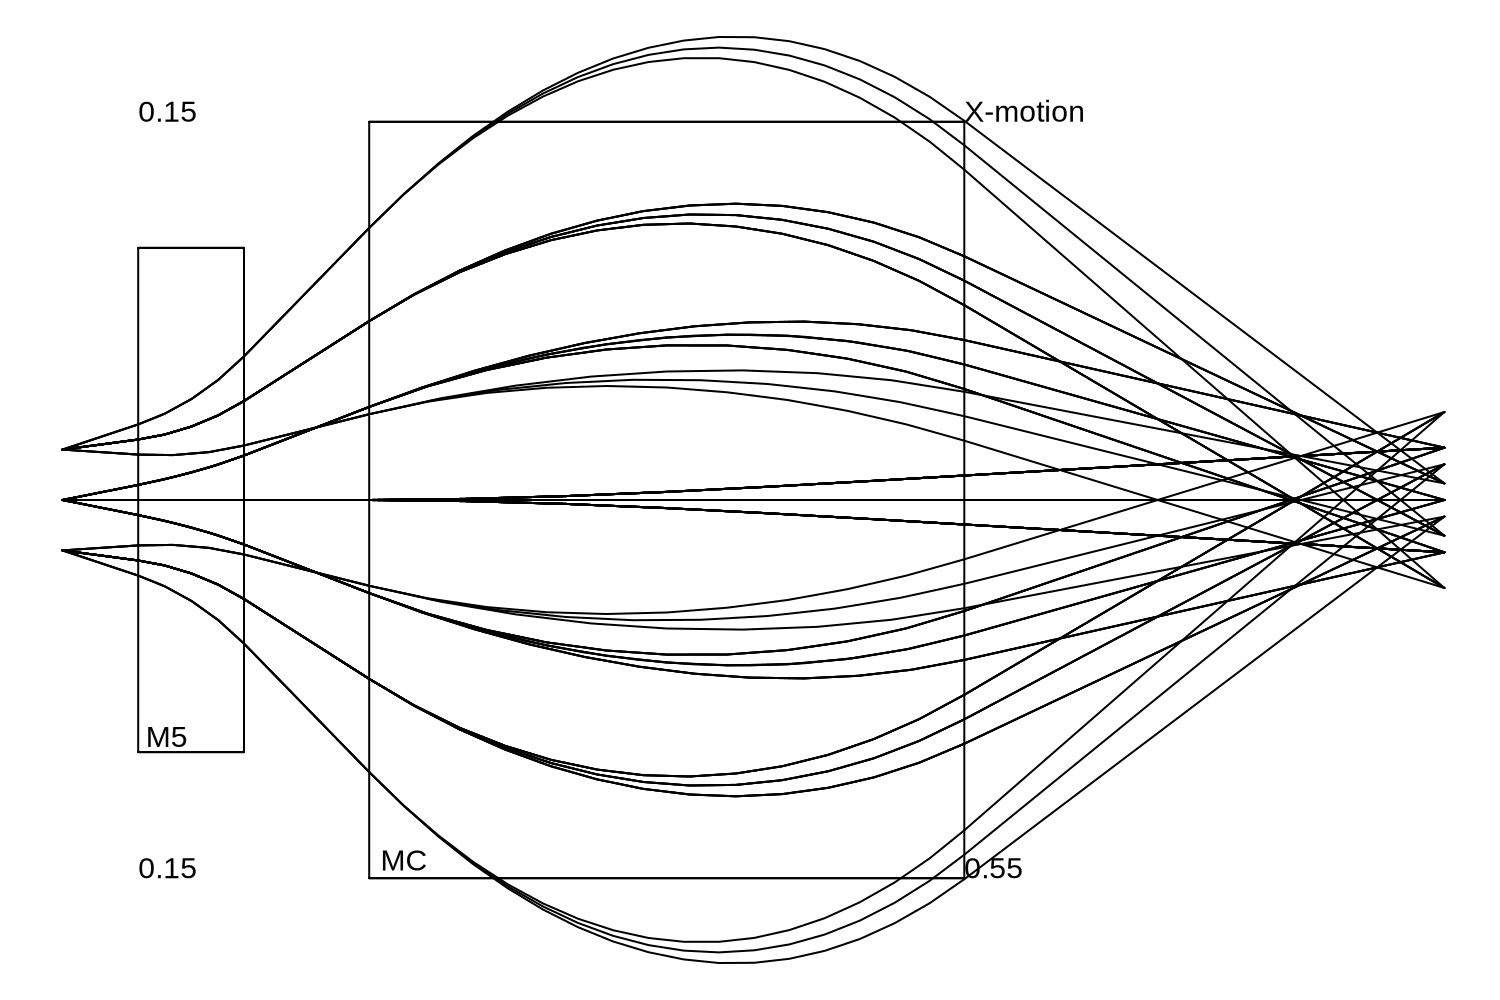

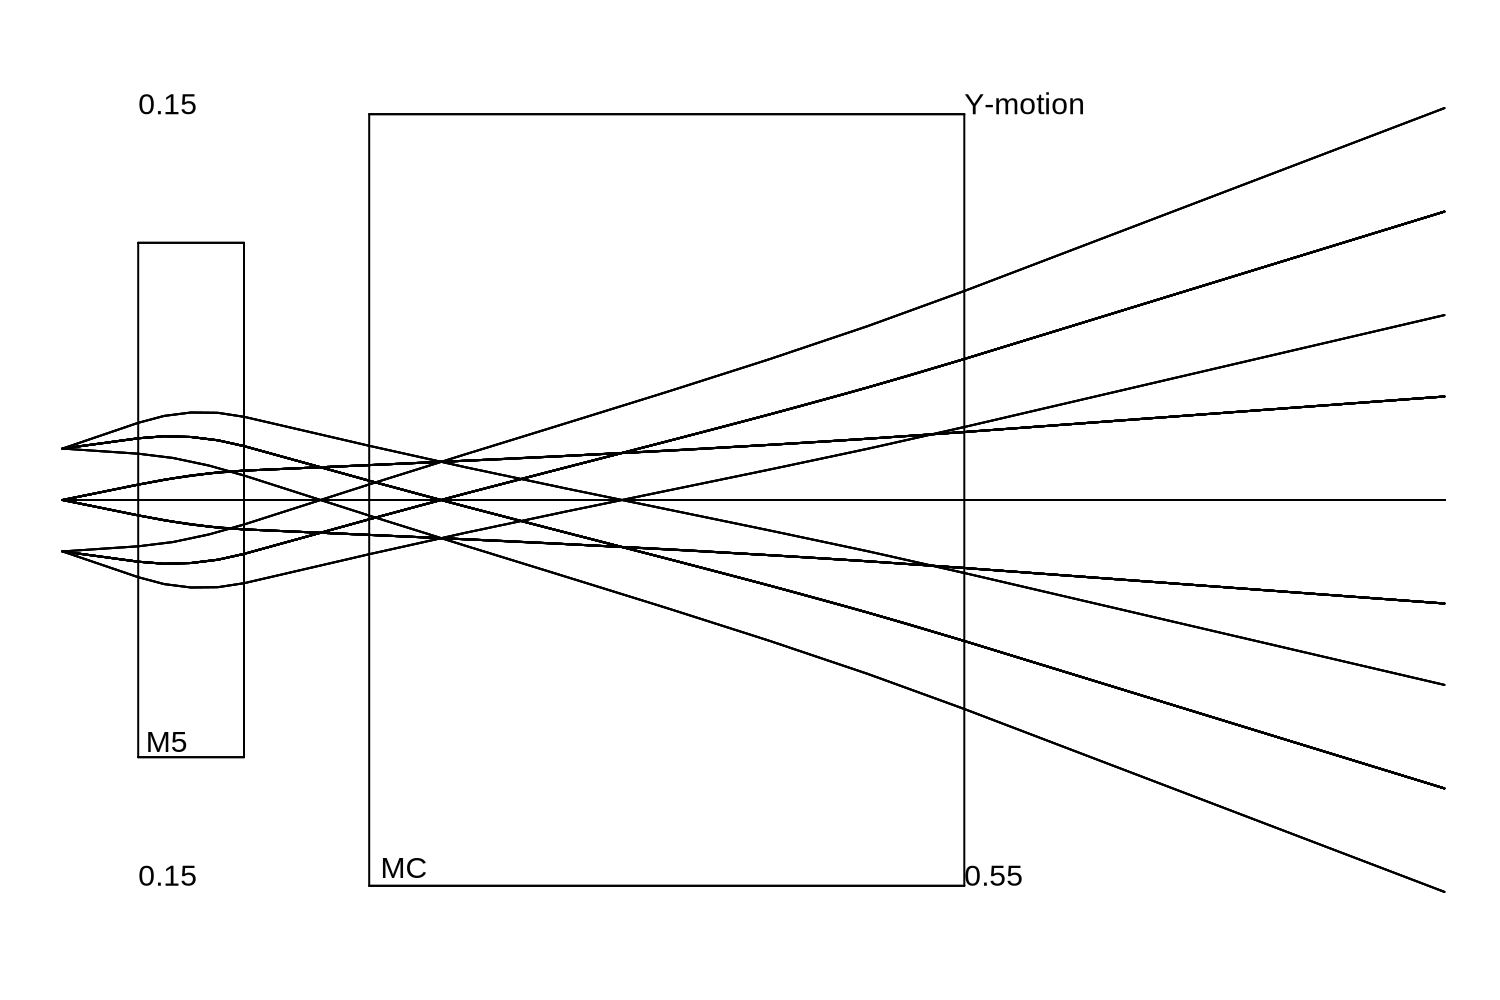

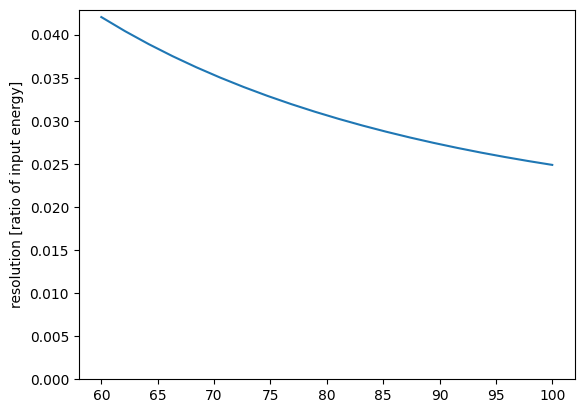

In [47]:
from mrs_ion_optics import gen_charictaristic_rays, MRSIonOptics
import mrs_ion_optics as K
from IPython.core.display import SVG, display_svg
import numpy as np
import matplotlib.pyplot as plt

R_FOIL = 0.015
L_DRIFT = 0.25
R_APERTURE = 0.01

sess = (
    MRSIonOptics()
    .set_parameter(K.K_p_m5a_quad, 0.4)
    # .set_parameter(K.K_p_m5a_length, 0.05)
    # .set_parameter(K.K_p_drift_pre_bend, 0.05)
    # .set_parameter(K.K_p_drift_post_bend, 0.05)
    # .set_parameter(K.K_p_m5b_quad, -0.03)
    # .set_parameter(K.K_p_m5b_length, 0.2)
    # .set_parameter(K.K_p_bend_angle, 90)
    .set_parameter(K.K_p_bend_radius, 0.25)
    .config_fit([K.K_p_drift_pre_hodoscope])
    .config_order(1)
    .config_vis_lab_coordinates(False)
    .config_outputs(["ME(1,1)","ME(1,2)","ME(1,6)"])
    .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3,energy=-0.02), color=3)
    .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3,energy=0.02), color=2)
)

# X = np.linspace(-0.25,0.5,20)
# V = np.array([sess.set_parameter(K.K_p_m5a_quad,x).exec()[1] for x in X])
# X = np.linspace(0.05,0.8,20)
# V = np.array([sess.set_parameter(K.K_p_bend_radius,x).exec()[1] for x in X])
X = np.linspace(60,100,20)
V = np.array([sess.set_parameter(K.K_p_bend_angle,x).exec()[1] for x in X])
plt.plot(X, np.abs(2*R_APERTURE*V[:, 0] / V[:, 2]))
plt.ylim(bottom = 0)
plt.ylabel("resolution [ratio of input energy]")

sess.print_params()
print()

# outputs, _ = sess.set_parameter(K.K_p_m5a_quad, 0.4).exec_fit()
# outputs, _ = sess.set_parameter(K.K_p_bend_radius, 0.25).exec_fit()
outputs, _ = sess.set_parameter(K.K_p_bend_angle, 90).exec_fit()
print("Magnification:", outputs[0])
print("Focus:", outputs[1])
print("Dispersion:", outputs[2])
print("Resolution:", abs(2 * R_APERTURE * outputs[0] / outputs[2]))
for svg_data in sess.exec_svg():
    display_svg(SVG(data=svg_data))

[46.29050182 46.29041458 46.29032734 46.29024009 46.29015285 46.29006561
 46.28997837 46.28989113 46.28980388 46.28971664 46.2896294  46.28954216
 46.28945491 46.28936767 46.28928043 46.28919319]
[17:16:06]  optimization:  1.25%  1.9s/2.6min  ETA: 17:18:40 [T-2.6min]
[7.06573571e+04 7.70779497e+03 8.21571534e+02 1.39240982e+02
 6.47199061e+01 5.30856742e+01 4.81218233e+01 4.62518336e+01
 4.69779445e+01 4.95863313e+01 5.34675020e+01 6.21587273e+01
 7.13296096e+01 8.07315800e+01 9.78369977e+01 1.20762733e+02]
[46.25188326 46.25187682 46.25187039 46.25186395 46.25185751 46.25185108
 46.25184464 46.2518382  46.25183177 46.25182533 46.25181889 46.25181246
 46.25180602 46.25179958 46.25179315 46.25178671]
[17:16:08]  optimization:  3.75%  3.9s/105.2s  ETA: 17:17:49 [T-101.3s]
[54.70606513 51.29800482 49.18322128 47.71818126 46.66935313 46.37776578
 46.25983508 46.23988363 46.32430785 46.56714126 46.99154899 47.54526949
 49.07448865 51.76151559 54.62480157 57.66548533]
[1383.00828215  741.932

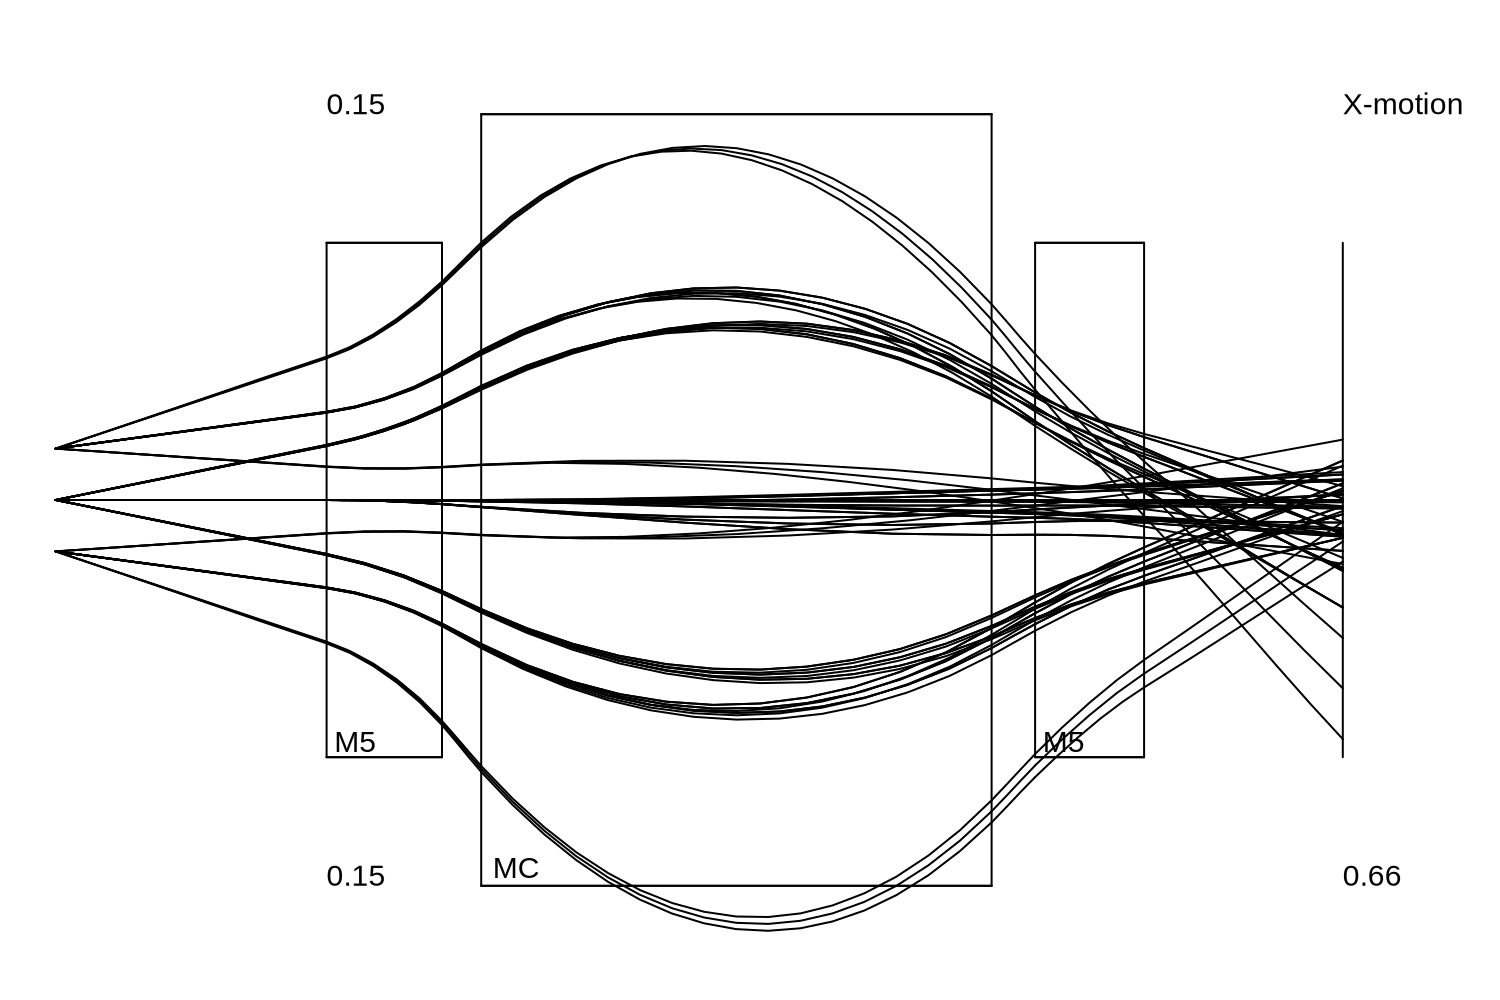

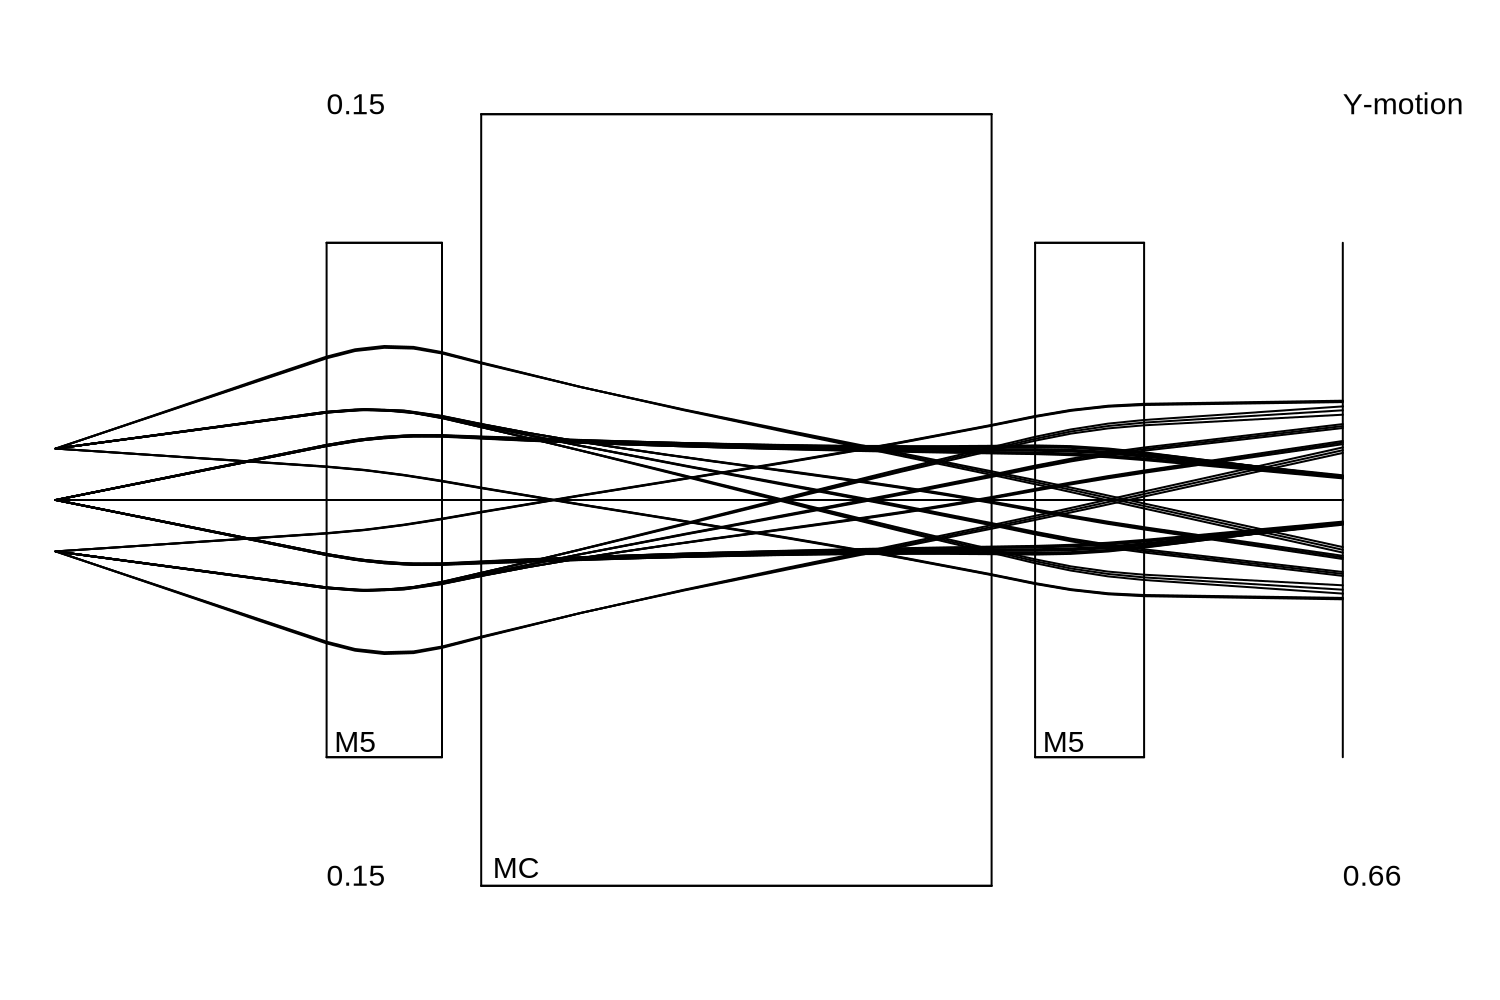

In [ ]:
from mrs_ion_optics import gen_charictaristic_rays, MRSIonOptics
import mrs_ion_optics as K
from IPython.core.display import SVG, display_svg
import numpy as np
import matplotlib.pyplot as plt
from util import begin_timer

R_FOIL = 0.015
L_DRIFT = 0.25
R_APERTURE = 0.01

# A is linear fit step, B is nonlinear fit step

p_lims = {
    # # A
    # K.K_p_bend_radius: (0.05, 0.5),
    # K.K_p_bend_angle: (60.0, 120.0),
    # K.K_p_drift_post_aperture: (0.001, 0.4),
    # K.K_p_drift_pre_bend: (0.001, 0.4),
    # K.K_p_drift_post_bend: (0.001, 0.4),
    # K.K_p_m5a_length: (0.05, 0.2),
    # K.K_p_m5a_quad: (-0.2, 0.4),
    # K.K_p_m5b_length: (0.05, 0.2),
    # K.K_p_m5b_quad: (-0.4, 0.4),
    # K.K_p_shape_in_1: (-0.25, 0.25),
    # K.K_p_shape_out_1: (-0.25, 0.25),

    # B
    K.K_p_m5a_hex: (-0.4,0.4),
    K.K_p_m5a_oct: (-0.4,0.4),
    K.K_p_m5a_dec: (-0.4,0.4),
    K.K_p_m5a_dodec: (-0.4,0.4),
    K.K_p_m5b_hex: (-0.4,0.4),
    K.K_p_m5b_oct: (-0.4,0.4),
    K.K_p_m5b_dec: (-0.4,0.4),
    K.K_p_m5b_dodec: (-0.4,0.4),
    K.K_p_shape_in_2: (-0.25, 0.25),
    K.K_p_shape_in_3: (-0.25, 0.25),
    K.K_p_shape_in_4: (-0.25, 0.25),
    K.K_p_shape_in_5: (-0.25, 0.25),
    K.K_p_shape_out_2: (-0.25, 0.25),
    K.K_p_shape_out_3: (-0.25, 0.25),
    K.K_p_shape_out_4: (-0.25, 0.25),
    K.K_p_shape_out_5: (-0.25, 0.25),
}


	# WV:=;
	# WVY:=(VMAX(RAY(3))-VMIN(RAY(3)))/2;
sess = (
    sess
    # MRSIonOptics()
    .disable_fit()
    # .config_fit([K.K_p_drift_pre_hodoscope])
    # .config_order(1) # A
    .config_order(5) # B
    .config_vis_lab_coordinates(False)
    .config_outputs([
        # f"ABS({2 * R_APERTURE}*ME(1,1)/ME(1,6))", # resolution as fraction of input energy
        "ME(1,1)", # magnification (dispersive direction)
        "ME(1,2)", # focus (dispersive direction)
        "ME(1,6)", # dispersion (dispersive direction)
        "ME(3,1)", # magnification (vertical direction)
        "ME(3,2)", # focus (vertical direction)
        "(VMAX(RAY(1))-VMIN(RAY(1)))/2", # image size (dispersive direction)
        "(VMAX(RAY(3))-VMIN(RAY(3)))/2", # image size (vertical direction)
    ],do_beamsize=True)
    .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
    # .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.02), color=3)
    # .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.02), color=2)
)

# uncertainties = [1]
# uncertainties = [1,0.3]
# uncertainties = [1,0.1]
# uncertainties = [1,0.3,0.1,0.03,0.01]
uncertainties = [1,0.5,0.25,0.125,0.0625]
enable_randomness = True
divs_per_uncertainty_step = 16
# divs_per_uncertainty_step = 8
update_timer = begin_timer("optimization")
i = 0
n = len(uncertainties) * len(p_lims)
for uncertainty in uncertainties:
# for uncertainty in [1,0.3,0.1,0.03,0.01]:
# for uncertainty in [1]:
    p_keys = list(p_lims.keys())
    if enable_randomness:
        np.random.shuffle(p_keys)
    for k in p_keys:
        p_lim = p_lims[k]
        X_ = np.linspace(-0.5, 0.5, divs_per_uncertainty_step)
        if enable_randomness:
            X_ *= 1 - 1/divs_per_uncertainty_step
            X_ += np.random.uniform(-0.5,0.5)/divs_per_uncertainty_step
        X = (
            X_ * uncertainty * (p_lim[1] - p_lim[0])
            + sess.parameter_values[k]
        )
        X += np.clip(p_lim[0] - X[0], a_min=0, a_max=None)
        X += np.clip(p_lim[-1] - X[1], a_min=None, a_max=0)
        # X += np.clip(p_lim[0] - X[0], a_min=None, a_max=0)
        # X += np.clip(p_lim[-1] - X[1], a_min=0, a_max=None)
        R = [sess.set_parameter(k, x).exec() for x in X]
        (
            # V_resolution,
            V_magnification,
            V_focus,
            V_dispersion,
            V_magnification_y,
            V_focus_y,
            V_imagesize_x,
            V_imagesize_y,
        ) = np.transpose([r[1] for r in R])
        V_beam_widths = np.array([r[3] for r in R]) # [X.size, 6]
        # V_resolution = np.abs(2*R_APERTURE*V_magnification / V_dispersion)
        V_resolution = V_imagesize_x/V_dispersion
        # sess.set_parameter(k,X[np.argmin(
        #     np.sum(np.abs([
        #     # np.max(np.abs([
        #         V_resolution/0.010*40,
        #         V_focus*1e5,
        #         V_magnification/0.1*10.0,
        #         np.abs(V_imagesize_x)/0.01*40,
        #         0.05/V_dispersion*20,
        #         # V_imagesize_y*4.0,
        #         # V_focus_y+V_magnification_y,
        #     ]),axis=0)
        #     +(
        #         np.sum(np.clip(np.abs(V_beam_widths)-0.020,a_min=0,a_max=None),axis=1)[:,0]/0.010*100
        #         + np.sum(np.clip(np.abs(V_beam_widths)-0.010,a_min=0,a_max=None),axis=1)[:,1]/0.010*50
        #     )
        # )])

        loss = np.sum(np.abs([
            # np.max(np.abs([
                V_resolution*500,
                V_focus*100,
                V_magnification*10.0,
                (np.abs(V_imagesize_x)-0.0025)*200,
                4/V_dispersion,
                # V_imagesize_y*4.0,
                # V_focus_y+V_magnification_y,
            ]),axis=0)+50*(
                np.sum(np.clip(np.abs(V_beam_widths)-0.05,a_min=0,a_max=None),axis=1)[:,0]
                + np.sum(np.clip(np.abs(V_beam_widths)-0.01,a_min=0,a_max=None),axis=1)[:,1]
            )
        print(loss)
        loss[np.isnan(loss)] = 100000

        sess.set_parameter(k,X[np.argmin(
            loss
        )])



        i += 1
        update_timer(i/n)


(
    # V_resolution,
    V_magnification,
    V_focus,
    V_dispersion,
    V_magnification_y,
    V_focus_y,
    # V_yarg,
    V_imagesize_x,
    V_imagesize_y,
), _, _ = sess.exec_fit()
# V_resolution = np.abs(2 * R_APERTURE * V_magnification / V_dispersion)
V_resolution = V_imagesize_x/V_dispersion
sess.print_params()
print()
print("Magnification:", V_magnification)
print("Focus:", V_focus)
print("Dispersion:", V_dispersion)
print("Resolution:", V_resolution)
print("Dispersive Image Size:", V_imagesize_x)
for svg_data in (sess
        .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.01), color=3)
        .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.01), color=2)
        .exec_svg()
):
    display_svg(SVG(data=svg_data))

In [15]:
sess.parameter_values[K.K_p_m5a_hex] = 0
sess.parameter_values[K.K_p_m5a_oct] = 0
sess.parameter_values[K.K_p_m5a_dec] = 0
sess.parameter_values[K.K_p_m5a_dodec] = 0
sess.parameter_values[K.K_p_m5b_hex] = 0
sess.parameter_values[K.K_p_m5b_oct] = 0
sess.parameter_values[K.K_p_m5b_dec] = 0
sess.parameter_values[K.K_p_m5b_dodec] = 0
sess.parameter_values[K.K_p_shape_in_2] = 0
sess.parameter_values[K.K_p_shape_in_3] = 0
sess.parameter_values[K.K_p_shape_in_4] = 0
sess.parameter_values[K.K_p_shape_in_5] = 0
sess.parameter_values[K.K_p_shape_out_2] = 0
sess.parameter_values[K.K_p_shape_out_3] = 0
sess.parameter_values[K.K_p_shape_out_4] = 0
sess.parameter_values[K.K_p_shape_out_5] = 0

In [26]:
sess.parameter_values

{'p_bend_radius': np.float64(0.1966977577778876),
 'p_bend_angle': np.float64(96.64570733458082),
 'p_drift_post_aperture': np.float64(0.1762143872921171),
 'p_drift_pre_bend': np.float64(0.02550040356110209),
 'p_drift_post_bend': np.float64(0.02831434725337644),
 'p_drift_pre_hodoscope': np.float64(0.1291667520862391),
 'p_m5a_length': np.float64(0.0750253072948523),
 'p_m5a_quad': np.float64(0.2213721371621621),
 'p_m5a_hex': np.float64(0.01053581367271088),
 'p_m5a_oct': np.float64(0.000988002356799893),
 'p_m5a_dec': np.float64(-0.09853440527435438),
 'p_m5a_dodec': np.float64(0.006629191228386419),
 'p_m5b_length': np.float64(0.07089004261558862),
 'p_m5b_quad': np.float64(0.1248113614957962),
 'p_m5b_hex': np.float64(0.03004705564990835),
 'p_m5b_oct': np.float64(0.02285176394308691),
 'p_m5b_dec': np.float64(0.06552140833797179),
 'p_m5b_dodec': np.float64(0.03862590781754333),
 'p_shape_in_1': np.float64(-0.08237874650699593),
 'p_shape_in_2': np.float64(0.27734375),
 'p_shape

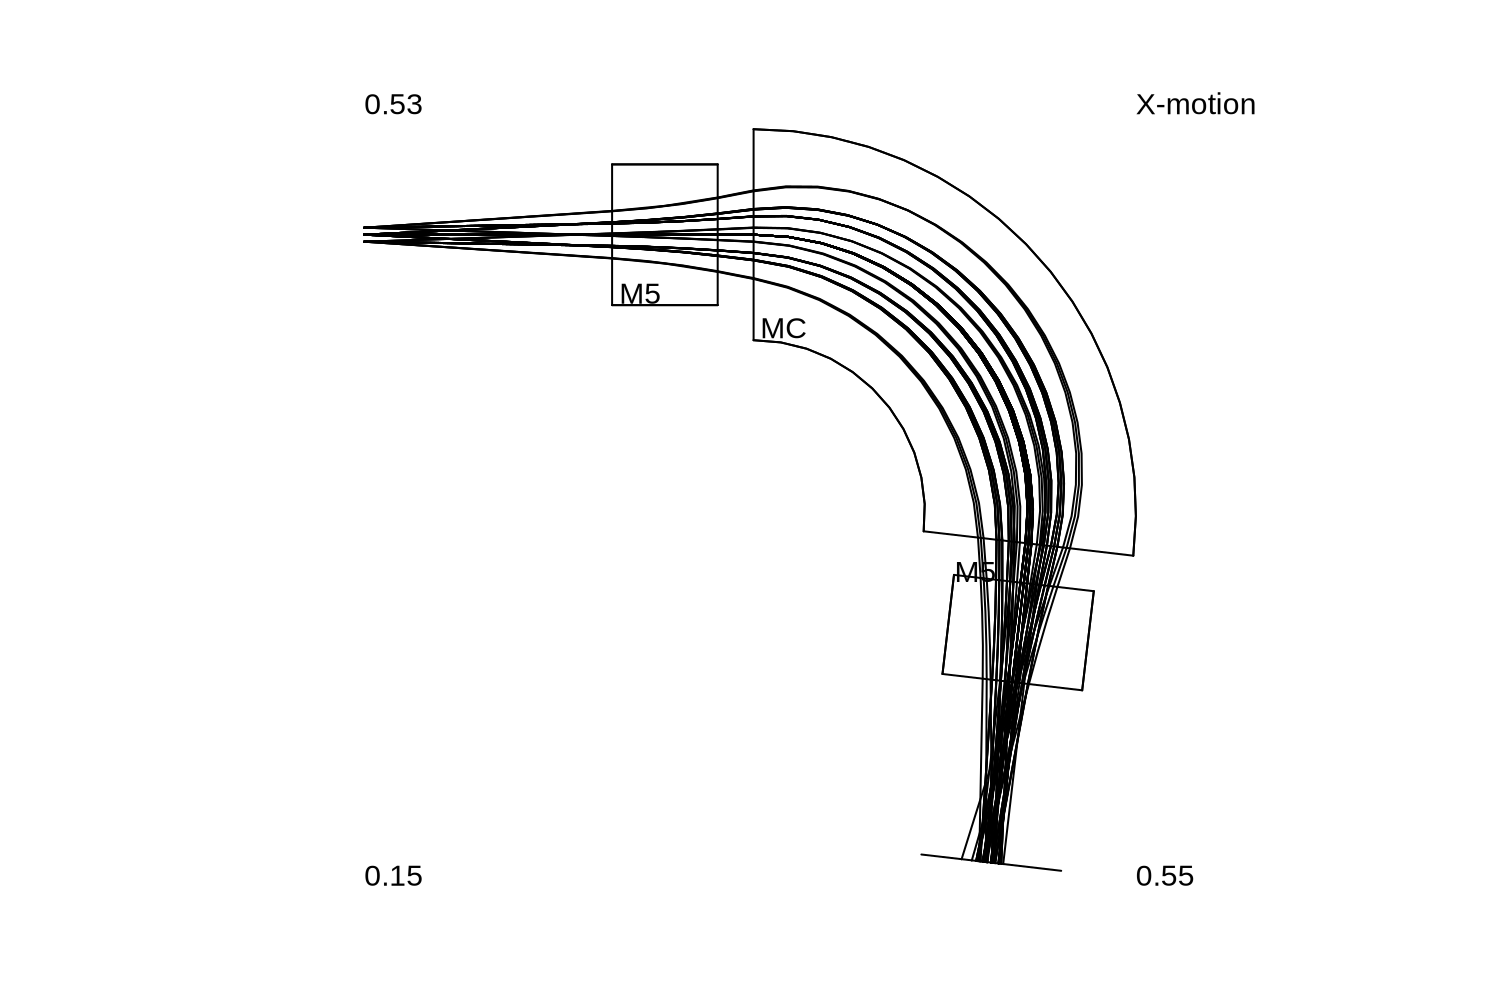

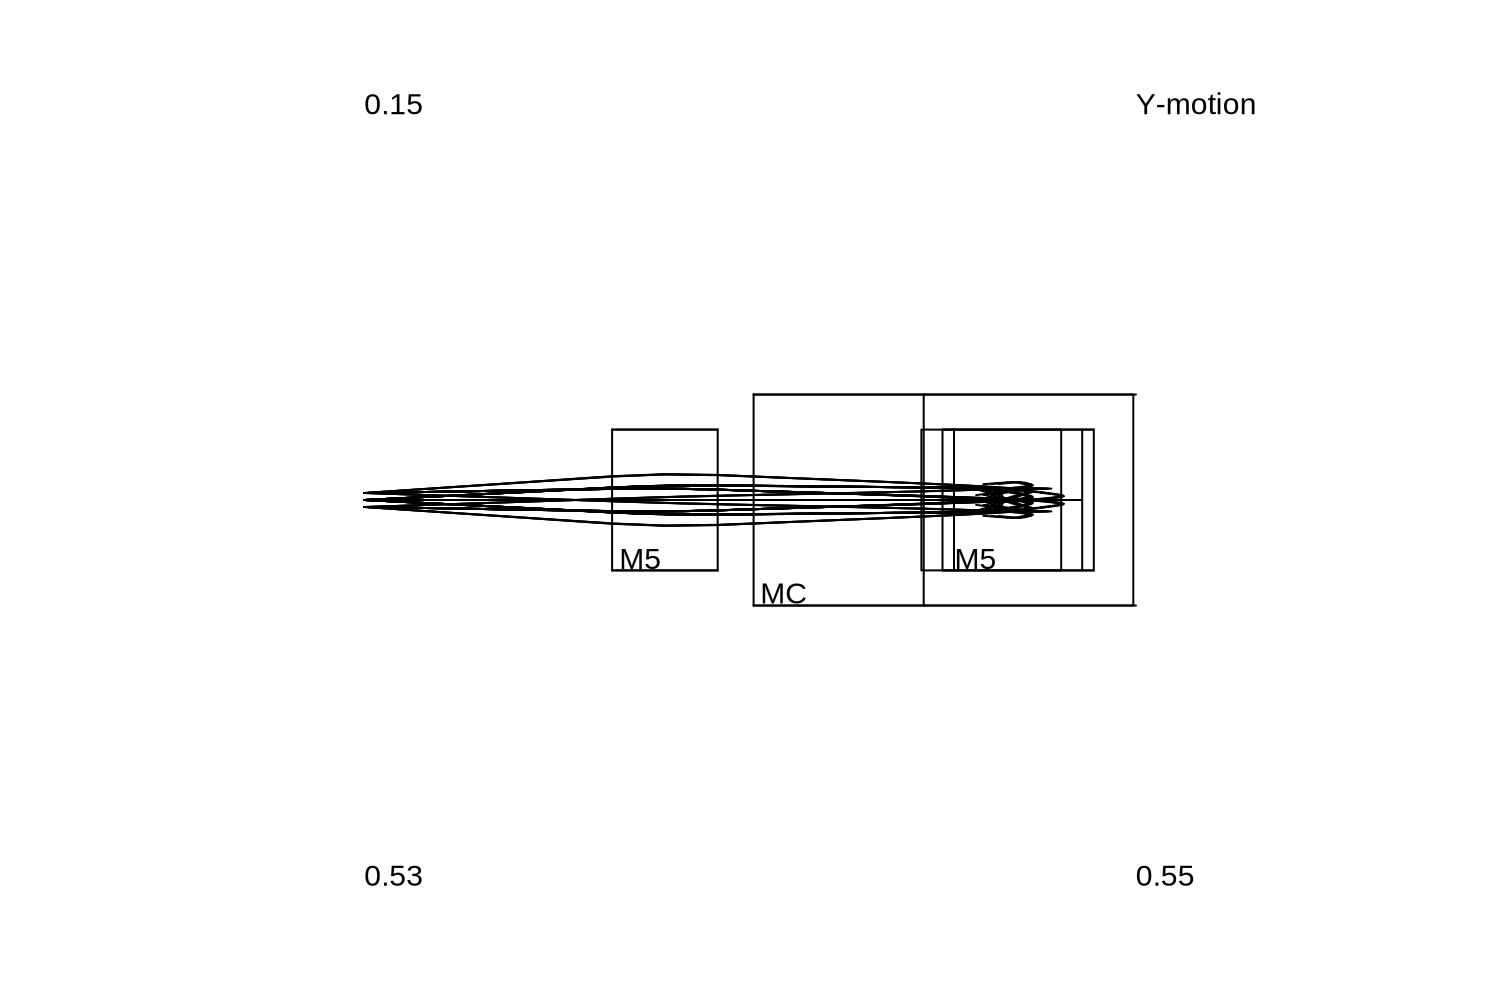

np.float64(0.027379024945080186)

In [20]:
for svg_data in sess.config_vis_lab_coordinates(True).config_order(5).exec_svg():
    display_svg(SVG(data=svg_data))


_, (
    # V_resolution,
    V_magnification,
    V_focus,
    V_dispersion,
    V_magnification_y,
    V_focus_y,
    # V_yarg,
    V_imagesize_x,
    V_imagesize_y,
), _, _ = sess.exec()
# V_resolution = np.abs(2 * R_APERTURE * V_magnification / V_dispersion)
V_resolution = np.abs(V_imagesize_x / V_dispersion)
V_resolution

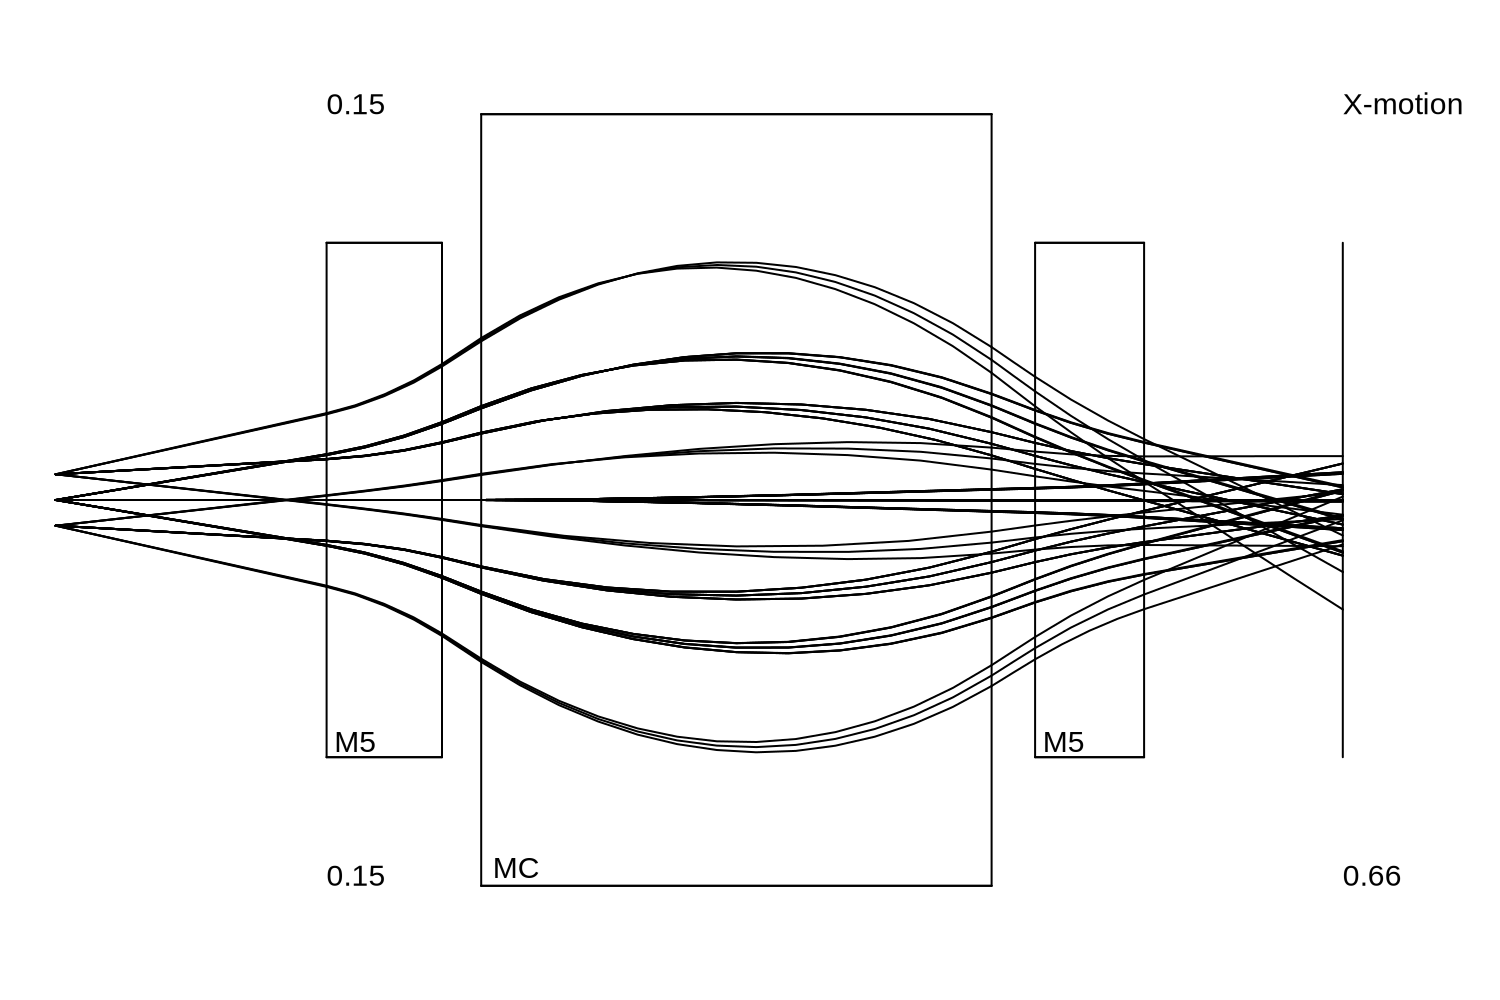

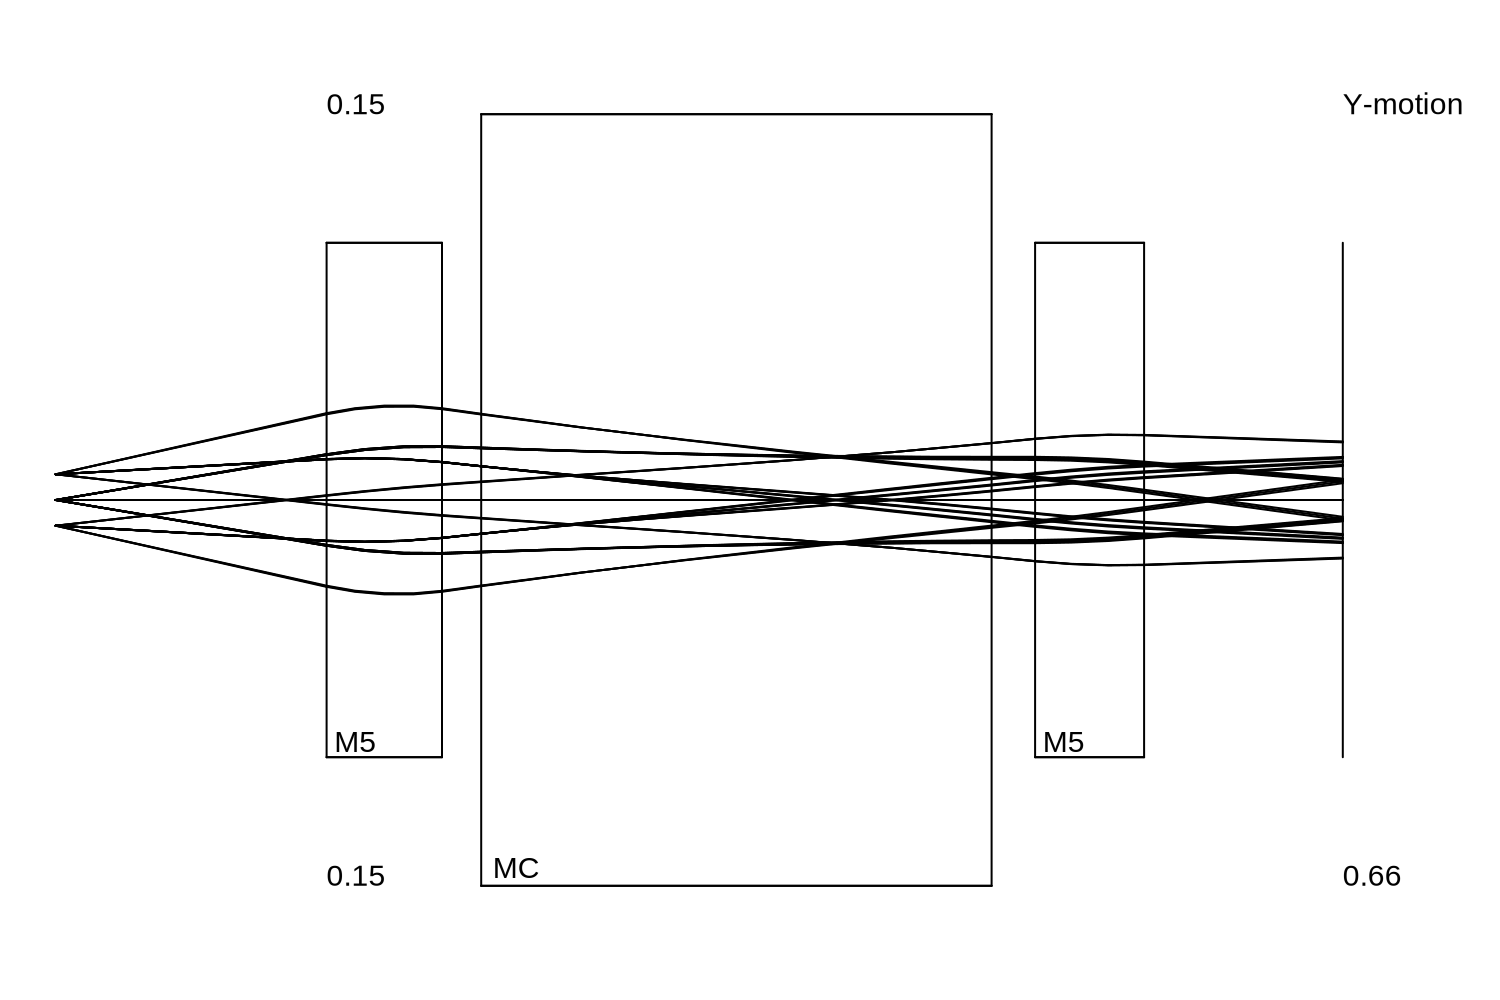

({'p_bend_radius': np.float64(0.1966977577778876),
  'p_bend_angle': np.float64(96.64570733458082),
  'p_drift_post_aperture': np.float64(0.1762143872921171),
  'p_drift_pre_bend': np.float64(0.02550040356110209),
  'p_drift_post_bend': np.float64(0.02831434725337644),
  'p_drift_pre_hodoscope': np.float64(0.1291667520862391),
  'p_m5a_length': np.float64(0.0750253072948523),
  'p_m5a_quad': np.float64(0.2213721371621621),
  'p_m5a_hex': np.float64(0.0),
  'p_m5a_oct': np.float64(0.0),
  'p_m5a_dec': np.float64(0.0),
  'p_m5a_dodec': np.float64(0.0),
  'p_m5b_length': np.float64(0.07089004261558862),
  'p_m5b_quad': np.float64(0.1248113614957962),
  'p_m5b_hex': np.float64(0.0),
  'p_m5b_oct': np.float64(0.0),
  'p_m5b_dec': np.float64(0.0),
  'p_m5b_dodec': np.float64(0.0),
  'p_shape_in_1': np.float64(-0.08237874650699593),
  'p_shape_in_2': np.float64(0.0),
  'p_shape_in_3': np.float64(0.0),
  'p_shape_in_4': np.float64(0.0),
  'p_shape_in_5': np.float64(0.0),
  'p_shape_out_1': np.

In [18]:

R_FOIL = 0.015
L_DRIFT = 0.3
R_APERTURE = 0.005
for svg_data in (sess
                 .set_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3), color=6)
                 .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=-0.01), color=3)
                 .add_rays(gen_charictaristic_rays(R_FOIL, L_DRIFT, R_APERTURE, n=3, energy=0.01), color=2)
                 .config_vis_lab_coordinates(False)
                 .exec_svg()):
    display_svg(SVG(data=svg_data))
sess.exec()

In [4]:
import numpy as np
r1, r2 = zip(*([x,[x,2,4]] for x in [1,2,3]))
np.array(r1), np.array(r2)

(array([1, 2, 3]),
 array([[1, 2, 4],
        [2, 2, 4],
        [3, 2, 4]]))